85


Text(0.5, 0.94, 'Histogram binning tries by hand')

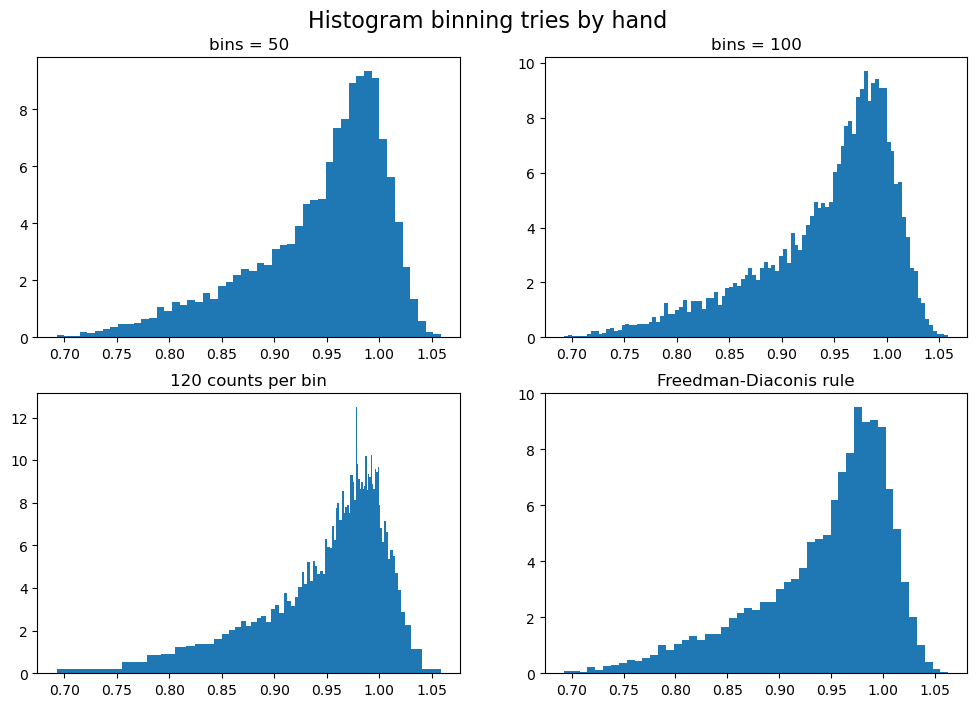

In [190]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import scipy
from astropy.visualization import hist

def f(x):
    return np.sqrt((1 + np.sqrt(1-x**2))/2)

sigma = 0.02
mu = 1
chi = np.random.uniform(0,1, 10000)
M = np.abs(np.random.normal(loc = mu, scale = sigma, size = 10000)) #np.abs to avoid negative masses
M_irr = M*f(chi)
bins_eq = np.append(np.sort(M_irr)[::120], np.max(M_irr))
print(len(bins_eq))

fig1, ax1 = plt.subplots(2, 2, figsize=(12,8))
ax1[0][0].hist(M_irr, bins = 50, density = True)
ax1[0][0].set_title("bins = 50")
ax1[0][1].hist(M_irr, bins = 100, density = True)
ax1[0][1].set_title("bins = 100")
ax1[1][0].hist(M_irr, bins = bins_eq, density = True)
ax1[1][0].set_title("120 counts per bin")
hist(M_irr, bins="freedman",density=True, ax = ax1[1][1])
ax1[1][1].set_title("Freedman-Diaconis rule")
fig1.suptitle("Histogram binning tries by hand", fontsize=16,y=0.94)

C:\Users\nicco\AppData\Local\Temp\ipykernel_9488\2342709641.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  M_irr_true = [scipy.integrate.quad(lambda f: integrand(f,m), 1/2**0.5,1)[0] for m in M_grid]


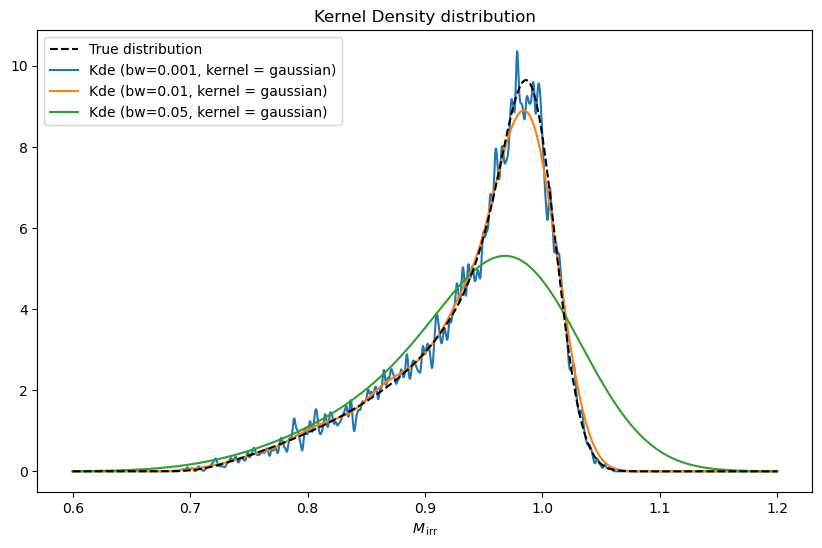

In [200]:
from sklearn.neighbors import KernelDensity

def integrand(f,x):
    return (np.sqrt((2/np.pi))/sigma)*np.exp(-(x/f-1)**2/(2*sigma**2))*(2*f**2-1)/np.sqrt(1-f**2)/f

fig2,ax2 = plt.subplots(figsize=(10,6))

M_grid = np.linspace(mu-20*sigma,mu +10*sigma,10000)


M_irr_true = [scipy.integrate.quad(lambda f: integrand(f,m), 1/2**0.5,1)[0] for m in M_grid]
ax2.plot(M_grid, M_irr_true, "--", color = "black", label = "True distribution", zorder = 2)

bwrange = [0.001, 0.01, 0.05]
for bw in bwrange:
   kde = KernelDensity(bandwidth = bw, kernel="gaussian")
   kde.fit(M_irr.reshape(-1,1))
   pdf_kd = np.exp(kde.score_samples(M_grid.reshape(-1,1)))
   ax2.plot(M_grid, pdf_kd, label=f"Kde (bw={bw}, kernel = gaussian)", zorder = 1)

ax2.set_title("Kernel Density distribution")
ax2.set_xlabel(rf"$M_{{\mathrm{{\,irr}}}}$")
ax2.legend()


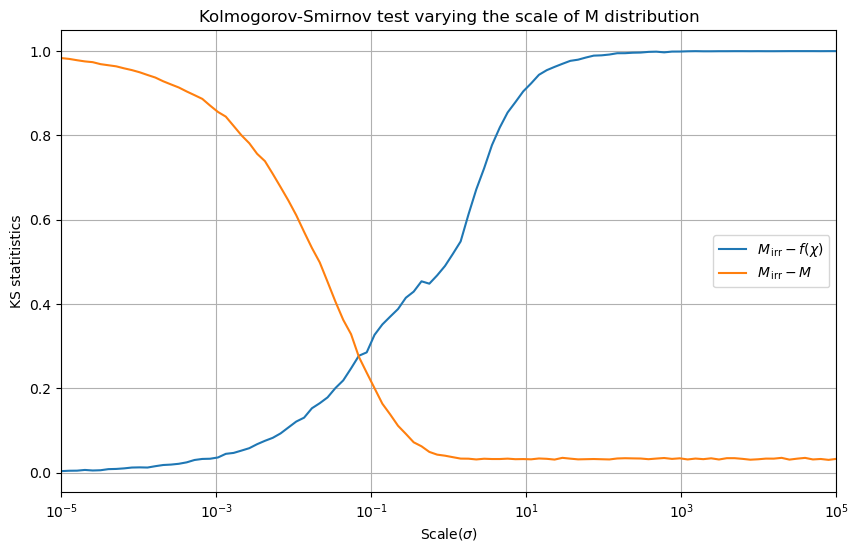

In [ ]:
from scipy import stats
from scipy.stats import ks_2samp

s_range = np.logspace(-5,5, 100)
ks_f = []
ks_M = []

for s in s_range:
   M = np.abs(np.random.normal(loc = mu, scale = s, size = 10000))
   M_irr =M*f(chi)
   ks_f.append(stats.ks_2samp(M_irr, f(chi)))
   ks_M.append(stats.ks_2samp(M_irr, M))

ks_f = np.array(ks_f)
ks_M= np.array(ks_M)

fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(s_range, ks_f[:,0], label=rf"$M_{{\mathrm{{\,irr}}}} - f(\chi)$")  
ax3.plot(s_range, ks_M[:,0], label=rf"$M_{{\mathrm{{\,irr}}}} - M$")
ax3.set_xscale('log')
ax3.set_xlabel(rf"Scale$(\sigma)$")
ax3.set_ylabel("KS statitistics")
ax3.set_xlim(np.min(s_range), np.max(s_range))
ax3.grid()
ax3.set_title("Kolmogorov-Smirnov test varying the scale of M distribution")
ax3.legend()
 
